In [1]:
import h5py
import numpy as np
import matplotlib.pylab as plt

In [2]:
class T2DataLoader:

    SENTINEL = 0b11111110000000000000000000000001

    def __init__(self, file_name, version=2) -> None:
        
        if version == 1:
            self.T2WRAPAROUND = 33552000
        elif version == 2:
            self.T2WRAPAROUND = 33552000  #% = 2^25  IMPORTANT! THIS IS NEW IN FORMAT V2.0

        with h5py.File(file_name) as f:
            event_times = np.concatenate(f['measurement/timeharp_260_t2/event_times'][:])[:]

        sync_flags = 1<<31
        sync_mask = np.argwhere(np.bitwise_and(event_times, sync_flags))
        self.sync_times = self.clean_sentinels(event_times[sync_mask].astype(np.uint64), sync_flags)

        chan0_flags = 1<<29
        chan0_mask = np.argwhere(np.bitwise_and(event_times, chan0_flags))
        self.chan0_times = self.clean_sentinels(event_times[chan0_mask].astype(np.uint64), chan0_flags)

        chan1_flags = 1<<28
        chan1_mask = np.argwhere(np.bitwise_and(event_times, chan1_flags))
        self.chan1_times = self.clean_sentinels(event_times[chan1_mask].astype(np.uint64), chan1_flags)

    def clean_sentinels(self, times, flags):
        senti_mask = times == self.SENTINEL
        senti_indices = np.argwhere(senti_mask)
        times -= flags

        for i in range(1, len(senti_indices)):
            s = senti_indices[i-1][0]+1
            e = senti_indices[i][0]
            times[s:e] = times[s:e] + ((i)*self.T2WRAPAROUND)
        times[e+1:] = times[e+1:] + (i+1)*self.T2WRAPAROUND
        return times[np.logical_not(senti_mask)]
        

In [11]:
file_name = '230114_223559_timeharp_260_t2.h5'
file_name = '230114_224612_timeharp_260_t2.h5'
file_name = '230115_000335_timeharp_260_t2.h5'

T2Data = T2DataLoader(file_name)



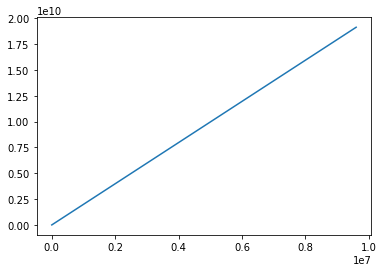

In [12]:
plt.figure()
plt.plot(T2Data.sync_times[:])

In [17]:
np.log2(9439394)

23.170262812252613